In [1]:
fig_dir = "../../figures/"
fig_ext = "pdf"

In [2]:
# Gravitational wave spectrum diagram
import matplotlib.pyplot as plt
#plt.style.use("../thesis-style.mpl")

import astropy.units as u
import numpy as np

import thesis

import grasshopper.interferometers as ifo
import grasshopper.timingarray as arrays

In [3]:
parameters = {
    "acoustic": {
        "color": "red",
        "range": [1e1, 1e4]
    },
    "space": {
        "color":"blue",
        "range": [1e-5, 1e1]
    },
    "cosmological": {
        "color":"green",
        "range": [1e-5, 1e-12]
    }
}

In [19]:
aligo = ifo.AdvancedLIGO()
#ax.text(280, 6e-23, r"\textsf{aLIGO}", rotation=60, rotation_mode='anchor', fontsize=6)
geo = ifo.GEO(frequencies=np.logspace(1,3.4,1000)*u.hertz)
#ax.text(280, 1.5e-21, r"\textsf{GEO}", rotation=60, rotation_mode='anchor', fontsize=6)
elisa = ifo.EvolvedLISA()
#bdecigo = ifo.BDecigo()
decigo = ifo.Decigo()
#bbo = ifo.BigBangObservatory()
#print(decigo.noise_amplitude(decigo.frequencies))
lisa = ifo.LISA()

In [15]:
ipta = arrays.IPTA()

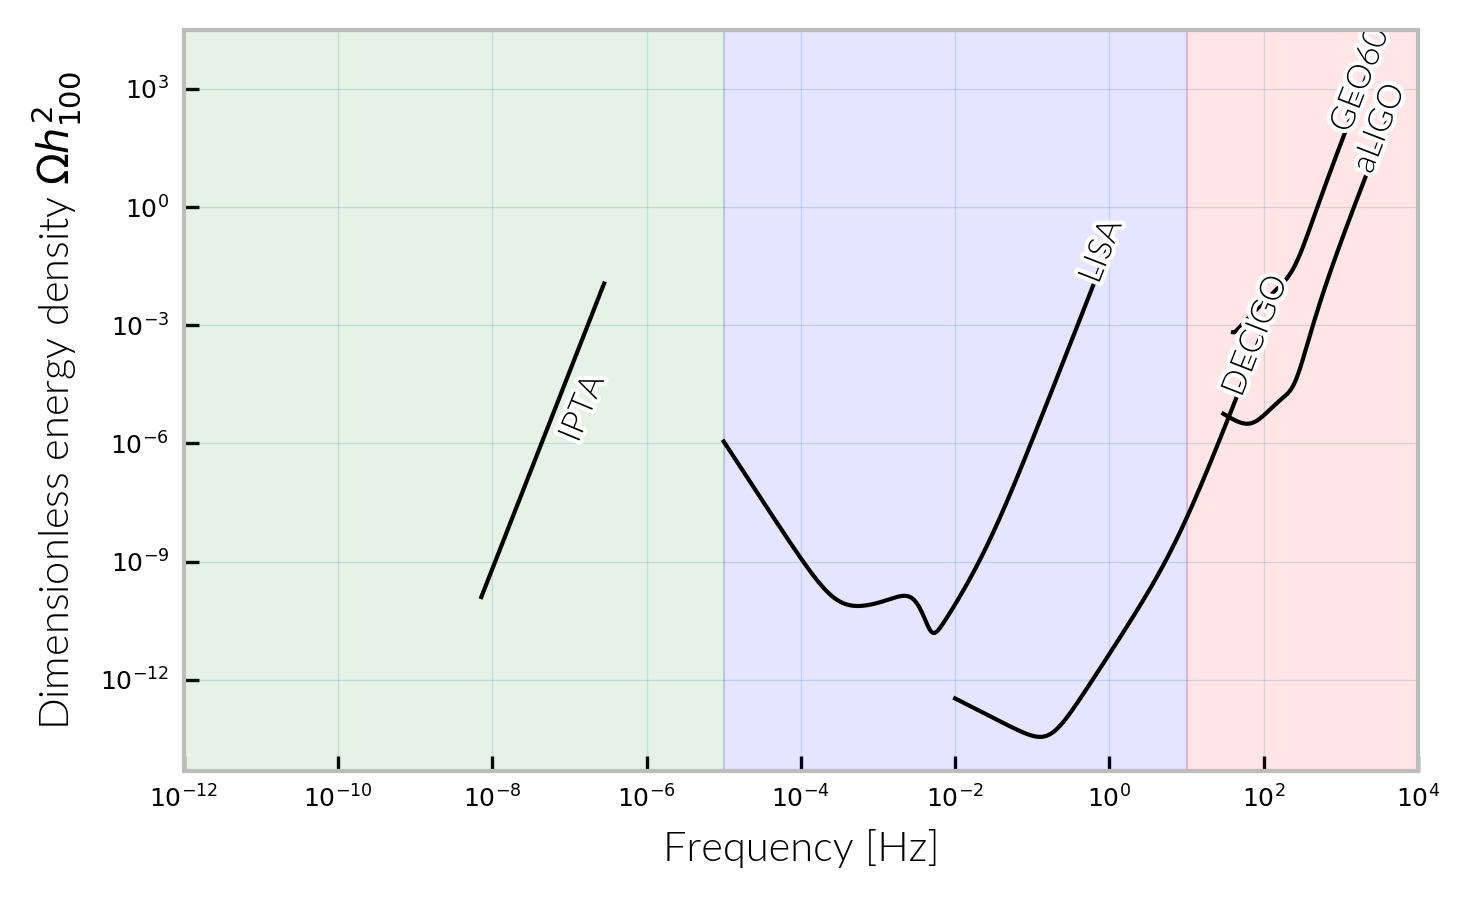

In [36]:
figsize = (6.0, 6.0/1.618) 
f, ax = plt.subplots(1,1, figsize=figsize, dpi=300)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1e-12, 1e4])

for band in parameters.items():
    ymax = ax.get_ylim()[1]
    #ax.text((band[1]["range"][1] - band[1]["range"][0])/2, ymax-100, r"{}".format(band[0]))
    ax.axvspan(band[1]["range"][0], band[1]["range"][1], alpha=0.1, color=band[1]["color"])
#ax.grid(which="minor", lw=0.5, linestyle="..", zorder=100)


geo_line = ax.plot(geo.frequencies, geo.energy_density(), color='k', lw=1, label="GEO600")
#thesis.labelLine(geo_line[0], label="GEO600", x=1000, yshift=2.5, fontsize=8)

ax.plot(aligo.frequencies, aligo.energy_density(), color='k', lw=1, label="aLIGO")

ax.plot(decigo.frequencies, decigo.energy_density(), color='k', lw=1, label="DECIGO")
ax.plot(lisa.frequencies, lisa.energy_density(), color='k', lw=1, label="LISA")

ipta_line = ax.plot(ipta.frequencies, ipta.energy_density(), color='k', lw=1, label="IPTA")
ipta_line[0].set_xdata(ipta_line[0].get_xdata()*u.hertz)

thesis.labelLines(f.gca().get_lines()[:-1], fontsize=8)
thesis.labelLine(ipta_line[0], label="IPTA", x=1.5e-7, yshift=.015,  fontsize=8)

#f.tight_layout()

for label in ax.get_yticklabels():
    label.set_fontproperties(thesis.ticks_font)

ax.set_ylabel(r"Dimensionless energy density $\Omega h_{100}^{2}$")
ax.set_xlabel("Frequency [Hz]")

f = thesis.thesisify(f)

f.savefig("{}/intro/spectrum-energy.{}".format(fig_dir, fig_ext))